<h2><center> CLIMATE CHANGE PROJECT</h2></center>

<figure>
<center><img src ="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ2AR_FnwONvRBRKnHxwR8WKEO9iY9nrOE0UA&usqp=CAU" width = "800" height = '500'/>

*About the problem*
> Climate 

*Objective of this challenge*
> In this challenge, your task is to develop

Summary

## Table of contents:

1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Feature engineering](#Engineering)
7. [Date features EDA](#Dates)
8. [Correlations - EDA](#Correlations)
9. [Preprocess test dataset](#Preprocess)
10. [Modelling](#Modelling)
11. [Making predictions of the test set and creating a submission file](#Predictions)
12. [TO DOs](#Tips)

## 1. Importing libraries

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import re

import nltk
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer
from nltk.corpus import stopwords 

from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth',200)

## 2. Loading data

In [222]:
# Loading files
train = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')
samplesubmission = pd.read_csv('sample_submission.csv')

#preview train data
train.head(15)

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954
5,1,Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,425577
6,1,RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R,294933
7,1,"RT @makeandmendlife: Six big things we can ALL do today to fight climate change, or how to be a climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ¢â‚¬Â¦",992717
8,1,"@AceofSpadesHQ My 8yo nephew is inconsolable. He wants to die of old age like me, but will perish in the fiery hellscape of climate change.",664510
9,1,RT @paigetweedy: no offense… but like… how do you just not believe… in global warming………,260471


In [223]:
samplesubmission

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1
...,...,...
10541,895714,1
10542,875167,1
10543,78329,1
10544,867455,1


In [171]:
test.head(15)

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928
5,RT @nycjim: Trump muzzles employees of several gov’t agencies in effort to suppress info on #climate change &amp; the environment. https://t.co…,75639
6,@bmastenbrook yes wrote that in 3rd yr Comp Sci ethics part. Was told by climate change denying Lecturer that I was wrong &amp; marked down.,211536
7,RT @climatehawk1: Indonesian farmers weather #climate change w/ conservation agriculture | @IPSNews https://t.co/1NZUCCMlYr…,569434
8,RT @guardian: British scientists face a ‘huge hit’ if the US cuts climate change research https://t.co/KlKQnYDXzh,315368
9,Aid For Agriculture | Sustainable agriculture and climate change adaptation for small-scale farmers https://t.co/q7IPCP59x9 via @aid4ag,591733


In [172]:
train.shape, test.shape,

((15819, 3), (10546, 2))

## 3.Statistical Summaries

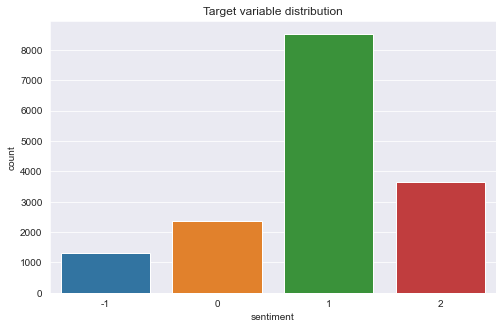

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [173]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(train["sentiment"])

plt.title('Target variable distribution')

plt.show()
train["sentiment"].value_counts()

## 4. Feature Engineering

In [174]:
# def clean_tweets(df, column):
    
#     # create another function to remove certain patterns
    
#     def remove_pattern(input_txt, pattern):
#         r = re.findall(pattern, input_txt)
#         for i in r:
#             input_txt = re.sub(i, '', input_txt)
#         return input_txt
    
#     pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+' # remove url
#     df[column] = df[column].replace(to_replace = pattern_url, regex = True)
    
#     df[column] = df[column].str.lower()                                # convert to lower case
#     df[column] = np.vectorize(remove_pattern)(df[column], "@[\w]*")    # removes twitter 
    
#     df[column] = df[column].str.replace("[^A-Za-z#]", " ")              # rid off punctuation and special characters
#     df[column] = df[column].str.replace("rt", " ")
    
    
    
#     x = df
    
#     return x

In [175]:
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text 

>rid off usernames handles

In [176]:
train['clean_tweets'] = np.vectorize(remove_pattern)(train['message'], '@[\w]*') #remove twitter usernames from test data
train['clean_tweets'] = train['clean_tweets'].str.replace('https?:\/\/\S+', ' ') # remove hyper links
train['clean_tweets'] = train['clean_tweets'].str.lower() #set object to lower case
train['clean_tweets'] = train['clean_tweets'].str.replace("rt", " ") #removes the retweet tag
train['clean_tweets'] = train['clean_tweets'].str.replace("[^A-Za-z#]", " ") # removes puntuaton marks except hash tag


train

,sentiment,message,tweetid,clean_tweets
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming and wait what via
1,1,It's not like we lack evidence of anthropogenic global warming,126103,it s not like we lack evidence of anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,researchers say we have three years to act on climate change before it s too late
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#todayinmaker# wired was a pivotal year in the war on climate change
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,it s and a racist sexist climate change denying bigot is leading in the polls #electionnight
...,...,...,...,...
15814,1,"RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…",22001,they took down the material on global warming lgbt rights and health care but now they re hocking melania s qvc
15815,2,RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq,17856,how climate change could be breaking up a million year old relationship
15816,0,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2,384248,notiven nytimesworld what does trump actually believe about climate change rick perry joins other aides in
15817,-1,RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦,819732,hey liberals the climate change crap is a hoax that ties to #agenda the climate is being changed by


> do the actions to the test data too

In [177]:
test['clean_tweets'] = np.vectorize(remove_pattern)(test['message'], '@[\w]*')
test['clean_tweets'] = test['clean_tweets'].str.replace('https?:\/\/\S+', ' ')
test['clean_tweets'] = test['clean_tweets'].str.lower() 
test['clean_tweets'] = test['clean_tweets'].str.replace("rt", " ") #removes the retweet tag
test['clean_tweets'] = test['clean_tweets'].str.replace("[^A-Za-z#]", " ") # removes puntuaton marks except hash tag


test

,message,tweetid,clean_tweets
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760,europe will now be looking to china to make sure that it is not alone in fighting climate change
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326,combine this with the polling of staffers re climate change and womens rights and you have a fascist state
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985,the scary unimpeachable evidence that climate change is already here #itstimetochange #climatechange
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263,putin got to you too jill trump doesn t believe in climate change at all thinks it s s hoax
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,female orgasms cause global warming sarcastic republican
...,...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about climate change. #climatechange #science #poetry #fakenews #alternativefacts https://t.co/RpUs…",895714,brb writing a poem about climate change #climatechange #science #poetry #fakenews #alternativefacts
10542,"2016: the year climate change came home: During the hottest year on record, Karl Mathiesen travelled to Tasmania… https://t.co/WwSrJQfvMg",875167,the year climate change came home during the hottest year on record karl mathiesen travelled to tasmania
10543,RT @loop_vanuatu: Pacific countries positive about Fiji leading the global climate change conference in November. https://t.co/PIPRndhkYd,78329,pacific countries positive about fiji leading the global climate change conference in november
10544,"RT @xanria_00018: You’re so hot, you must be the cause for global warming. #ALDUBLaborOfLove @jophie30 @asn585",867455,you re so hot you must be the cause for global warming #aldublaboroflove


In [178]:
def remove_stopwords(txt_tokens):# rid stopwords
    stoplist = set(stopwords.words("english"))
    
    txt_clean = [word for word in txt_tokens if word not in stoplist]
    return txt_clean


In [179]:
train_tweet_tokens = train['clean_tweets'].apply(lambda x:x.split()) 

train_tweet_tokens

0                     [polyscimajor, epa, chief, doesn, t, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, via]
1                                                                   [it, s, not, like, we, lack, evidence, of, anthropogenic, global, warming]
2                                           [researchers, say, we, have, three, years, to, act, on, climate, change, before, it, s, too, late]
3                                                            [#todayinmaker#, wired, was, a, pivotal, year, in, the, war, on, climate, change]
4                                [it, s, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls, #electionnight]
                                                                         ...                                                                  
15814    [they, took, down, the, material, on, global, warming, lgbt, rights, and, health, care, but, now, they, re, hocking, melania, s, qvc]

In [180]:
train_tweet_tokens = train_tweet_tokens.apply(remove_stopwords)
train_tweet_tokens

0          [polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, wait, via]
1                                               [like, lack, evidence, anthropogenic, global, warming]
2                                         [researchers, say, three, years, act, climate, change, late]
3                                         [#todayinmaker#, wired, pivotal, year, war, climate, change]
4                    [racist, sexist, climate, change, denying, bigot, leading, polls, #electionnight]
                                                     ...                                              
15814             [took, material, global, warming, lgbt, rights, health, care, hocking, melania, qvc]
15815                             [climate, change, could, breaking, million, year, old, relationship]
15816    [notiven, nytimesworld, trump, actually, believe, climate, change, rick, perry, joins, aides]
15817                    [hey, liberals, climate, change, crap, hoax, tie

In [181]:
test_tweet_tokens = test['clean_tweets'].apply(lambda x:x.split()) 

test_tweet_tokens

0                           [europe, will, now, be, looking, to, china, to, make, sure, that, it, is, not, alone, in, fighting, climate, change]
1                 [combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, rights, and, you, have, a, fascist, state]
2                              [the, scary, unimpeachable, evidence, that, climate, change, is, already, here, #itstimetochange, #climatechange]
3                               [putin, got, to, you, too, jill, trump, doesn, t, believe, in, climate, change, at, all, thinks, it, s, s, hoax]
4                                                                               [female, orgasms, cause, global, warming, sarcastic, republican]
                                                                          ...                                                                   
10541                           [brb, writing, a, poem, about, climate, change, #climatechange, #science, #poetry, #fakenews, #alt

In [182]:
test_tweet_tokens = test_tweet_tokens.apply(remove_stopwords)
test_tweet_tokens

0                                        [europe, looking, china, make, sure, alone, fighting, climate, change]
1                                 [combine, polling, staffers, climate, change, womens, rights, fascist, state]
2                  [scary, unimpeachable, evidence, climate, change, already, #itstimetochange, #climatechange]
3                                             [putin, got, jill, trump, believe, climate, change, thinks, hoax]
4                                              [female, orgasms, cause, global, warming, sarcastic, republican]
                                                          ...                                                  
10541    [brb, writing, poem, climate, change, #climatechange, #science, #poetry, #fakenews, #alternativefacts]
10542          [year, climate, change, came, home, hottest, year, record, karl, mathiesen, travelled, tasmania]
10543              [pacific, countries, positive, fiji, leading, global, climate, change, conference, no

In [183]:
wn = nltk.WordNetLemmatizer()

In [184]:
 def lemmatization(no_stopwords):
        text = [wn.lemmatize(word) for word in no_stopwords]
        return text


In [185]:
train_tweet_tokens = train_tweet_tokens.apply(lemmatization) 


test_tweet_tokens = test_tweet_tokens.apply(lemmatization) #Adding the column lemmas to the df dataframe


In [186]:
train_tweet_tokens

0        [polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, wait, via]
1                                             [like, lack, evidence, anthropogenic, global, warming]
2                                         [researcher, say, three, year, act, climate, change, late]
3                                       [#todayinmaker#, wired, pivotal, year, war, climate, change]
4                   [racist, sexist, climate, change, denying, bigot, leading, poll, #electionnight]
                                                    ...                                             
15814            [took, material, global, warming, lgbt, right, health, care, hocking, melania, qvc]
15815                           [climate, change, could, breaking, million, year, old, relationship]
15816    [notiven, nytimesworld, trump, actually, believe, climate, change, rick, perry, join, aide]
15817                    [hey, liberal, climate, change, crap, hoax, tie, #agenda, climate,

In [187]:
test_tweet_tokens

0                                        [europe, looking, china, make, sure, alone, fighting, climate, change]
1                                    [combine, polling, staffer, climate, change, woman, right, fascist, state]
2                  [scary, unimpeachable, evidence, climate, change, already, #itstimetochange, #climatechange]
3                                              [putin, got, jill, trump, believe, climate, change, think, hoax]
4                                               [female, orgasm, cause, global, warming, sarcastic, republican]
                                                          ...                                                  
10541    [brb, writing, poem, climate, change, #climatechange, #science, #poetry, #fakenews, #alternativefacts]
10542          [year, climate, change, came, home, hottest, year, record, karl, mathiesen, travelled, tasmania]
10543                [pacific, country, positive, fiji, leading, global, climate, change, conference, no

In [188]:
# for i in range(len(train_tweet_tokens)):
#     train_tweet_tokens[i] = ' '.join(train_tweet_tokens[i]) #concat all words into one sentence
# train['clean_tweets'] = train_tweet_tokens

In [190]:
# for i in range(len(test_tweet_tokens)):
#     test_tweet_tokens[i] = ' '.join(test_tweet_tokens[i]) #concat all words into one sentence
# test['clean_tweets'] = test_tweet_tokens

In [191]:
train

,sentiment,message,tweetid,clean_tweets
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor epa chief think carbon dioxide main cause global warming wait via
1,1,It's not like we lack evidence of anthropogenic global warming,126103,like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,researcher say three year act climate change late
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#todayinmaker# wired pivotal year war climate change
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,racist sexist climate change denying bigot leading poll #electionnight
...,...,...,...,...
15814,1,"RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…",22001,took material global warming lgbt right health care hocking melania qvc
15815,2,RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq,17856,climate change could breaking million year old relationship
15816,0,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2,384248,notiven nytimesworld trump actually believe climate change rick perry join aide
15817,-1,RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦,819732,hey liberal climate change crap hoax tie #agenda climate changed


In [192]:
test

,message,tweetid,clean_tweets
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760,europe looking china make sure alone fighting climate change
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326,combine polling staffer climate change woman right fascist state
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985,scary unimpeachable evidence climate change already #itstimetochange #climatechange
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263,putin got jill trump believe climate change think hoax
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,female orgasm cause global warming sarcastic republican
...,...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about climate change. #climatechange #science #poetry #fakenews #alternativefacts https://t.co/RpUs…",895714,brb writing poem climate change #climatechange #science #poetry #fakenews #alternativefacts
10542,"2016: the year climate change came home: During the hottest year on record, Karl Mathiesen travelled to Tasmania… https://t.co/WwSrJQfvMg",875167,year climate change came home hottest year record karl mathiesen travelled tasmania
10543,RT @loop_vanuatu: Pacific countries positive about Fiji leading the global climate change conference in November. https://t.co/PIPRndhkYd,78329,pacific country positive fiji leading global climate change conference november
10544,"RT @xanria_00018: You’re so hot, you must be the cause for global warming. #ALDUBLaborOfLove @jophie30 @asn585",867455,hot must cause global warming #aldublaboroflove


In [204]:
train

,sentiment,message,tweetid,clean_tweets
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor epa chief think carbon dioxide main cause global warming wait via
1,1,It's not like we lack evidence of anthropogenic global warming,126103,like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,researcher say three year act climate change late
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#todayinmaker# wired pivotal year war climate change
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,racist sexist climate change denying bigot leading poll #electionnight
...,...,...,...,...
15814,1,"RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…",22001,took material global warming lgbt right health care hocking melania qvc
15815,2,RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq,17856,climate change could breaking million year old relationship
15816,0,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2,384248,notiven nytimesworld trump actually believe climate change rick perry join aide
15817,-1,RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦,819732,hey liberal climate change crap hoax tie #agenda climate changed


In [206]:
X = train['clean_tweets']
y = train['sentiment']
X

0         polyscimajor epa chief think carbon dioxide main cause global warming wait via
1                                        like lack evidence anthropogenic global warming
2                                      researcher say three year act climate change late
3                                   #todayinmaker# wired pivotal year war climate change
4                 racist sexist climate change denying bigot leading poll #electionnight
                                              ...                                       
15814            took material global warming lgbt right health care hocking melania qvc
15815                        climate change could breaking million year old relationship
15816    notiven nytimesworld trump actually believe climate change rick perry join aide
15817                   hey liberal climate change crap hoax tie #agenda climate changed
15818                                                climate change equation screenshots
Name: clean_tweets, L

In [212]:
vect = CountVectorizer()
X = vect.fit_transform(train['clean_tweets'].values.astype(str))
X

<15819x13676 sparse matrix of type '<class 'numpy.int64'>'
	with 152019 stored elements in Compressed Sparse Row format>

In [215]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

Accuracy score: 0.7032237673830595


              precision    recall  f1-score   support

          -1       0.72      0.35      0.47       278
           0       0.50      0.41      0.45       425
           1       0.74      0.83      0.78      1755
           2       0.71      0.71      0.71       706

    accuracy                           0.70      3164
   macro avg       0.66      0.57      0.60      3164
weighted avg       0.70      0.70      0.69      3164



In [225]:
pred = rfc.predict(X_test)


sub_file = samplesubmission.copy()
sub_file.Offset_fault = pred
sub_file.to_csv('DennisSubmission.csv', index = False)